In [26]:
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.pyplot  as plt
import numpy as np

df = pd.read_csv("USArrests.csv")
df.head(5)

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


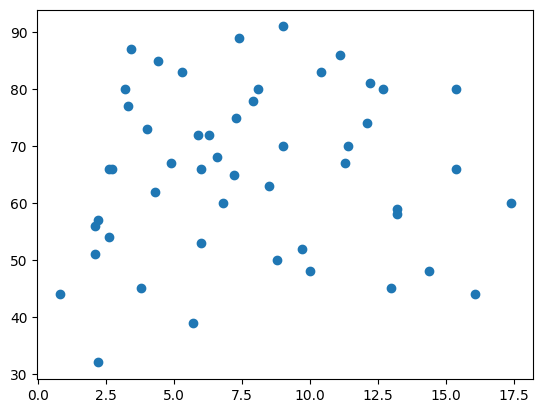

In [27]:
from sklearn.cluster import KMeans

X = df.drop('State', axis = 1)
Y = df['State']

plt.scatter(X['Murder'],X['UrbanPop'])



In [28]:
inertias = []
distortions = [] 
for k in range(1,10):
    #build and fit the model
    model = KMeans(n_clusters = k).fit(X)
    distance = cdist (X, model.cluster_centers_,
                        'euclidean')
    distortion = sum(np.min(distance, axis = 1))/X.shape[0]
    distortions.append(distortion)

    inertia = model.inertia_
    inertias.append(inertia)

    



Text(0.5, 1.0, 'Elbow Method with Distortion')

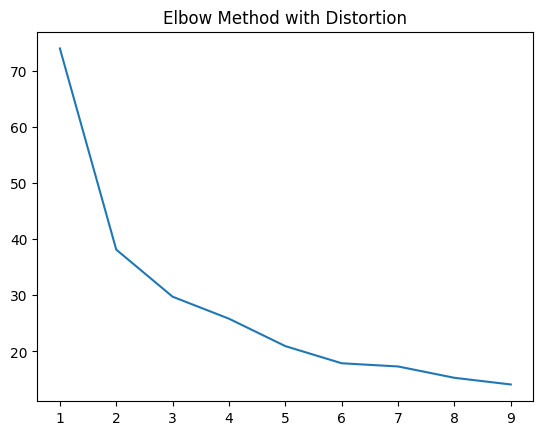

In [29]:
plt.plot(range(1,10), distortions)
plt.title('Elbow Method with Distortion')

Text(0.5, 1.0, 'Elbow Method with Inertia')

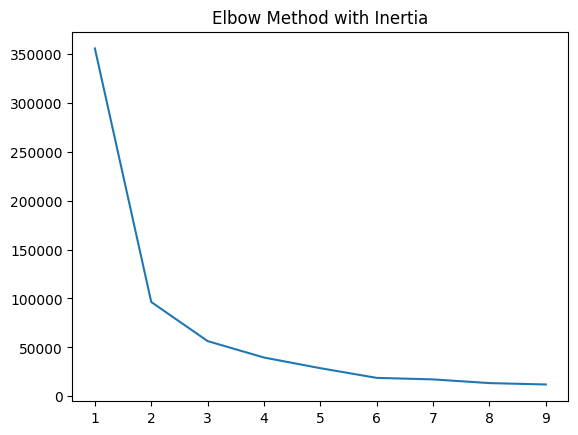

In [30]:
plt.plot(range(1,10),inertias)
plt.title('Elbow Method with Inertia')

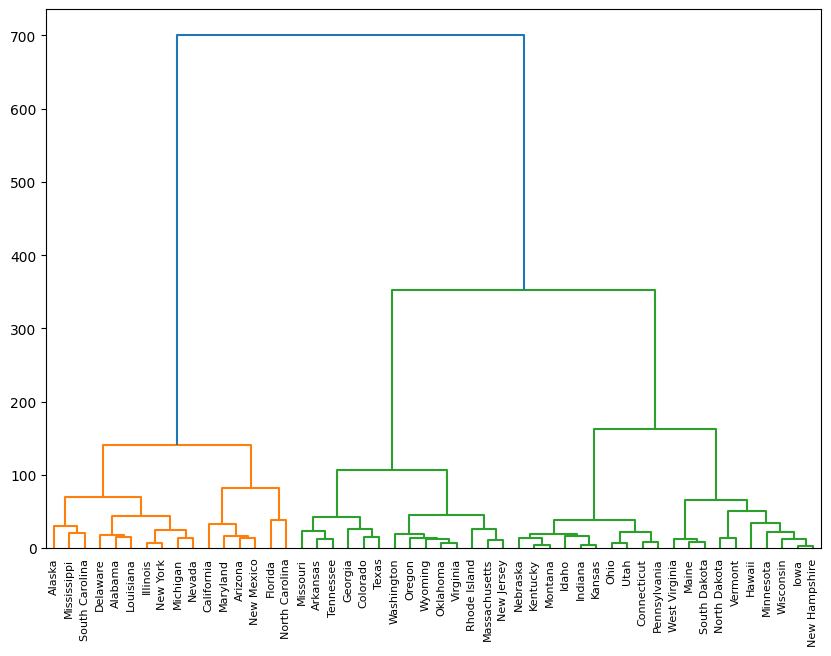

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage (X, 'ward')
plt.figure(figsize=(10,7))

dendro = dendrogram(linked, labels = list(Y))